# Length of vector:

In [ ]:
import numpy as np
def compute_length(vector):
    length = np.sqrt(np.sum([v**2 for v in vector]))
    return length

vector = np.array([3,4,5,6])
res = compute_length(vector)
print(round(res,2))

#cách khác: np.linalg.norm(vector)

9.27


# Dot product:

In [ ]:
import numpy as np
def compute_dot_product(v1, v2):
    dot_product = np.dot(v1,v2)
    return dot_product

v1 = np.array((1,2,3))
v2 = np.array((4,5,6))
res = compute_dot_product(v1,v2)
print(res)

#cách khác: v1 @ v2

32


# Multiplying a vector by a matrix/ a vector by a matrix

In [ ]:
a = np.array([[1,2,3],
             [4,5,6],
             [7,8,9]])

b = np.array([[1,2,3],
             [4,5,6],
             [7,8,9]])

c = np.array((2, 0, 2))
print(a * c)
print(a * b)

[[ 2  0  6]
 [ 8  0 12]
 [14  0 18]]
[[ 1  4  9]
 [16 25 36]
 [49 64 81]]


# Inverse matrix:
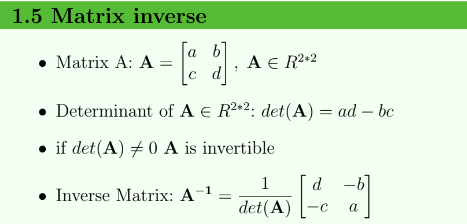

In [ ]:
import numpy as np
A = np.array([[4, 7], [2, 6]])
A_inv = np.linalg.inv(A)

print("Ma trận A:")
print(A)

print("\nMa trận nghịch đảo của A:")
print(A_inv)


Ma trận A:
[[4 7]
 [2 6]]

Ma trận nghịch đảo của A:
[[ 0.6 -0.7]
 [-0.2  0.4]]


**Định thức 3 chiều:* 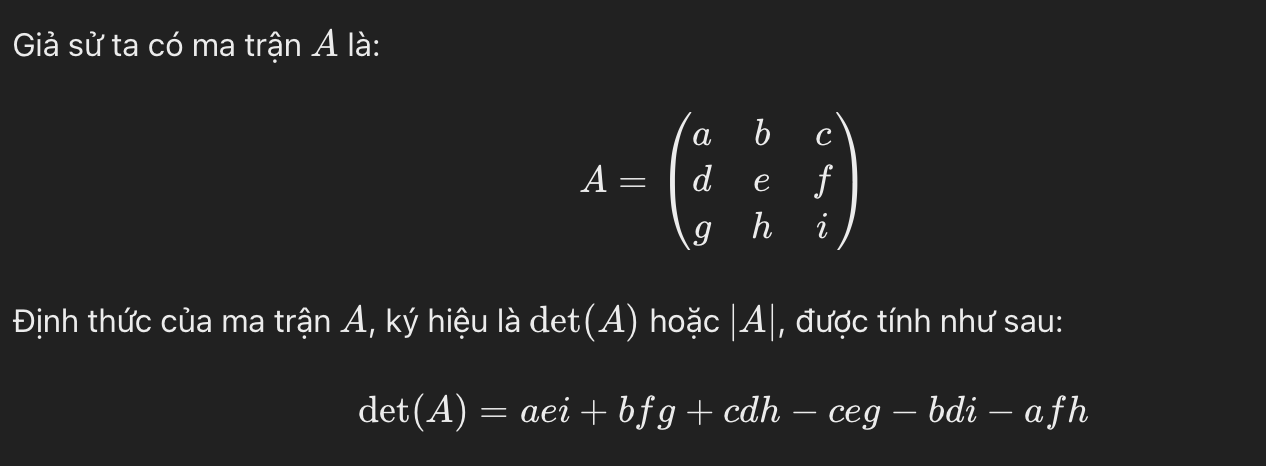

# Eigenvalue and eigenvector:
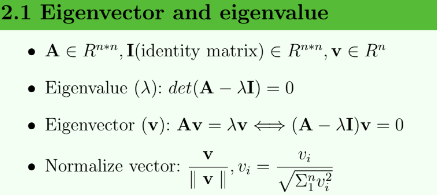



1.   Ví dụ:

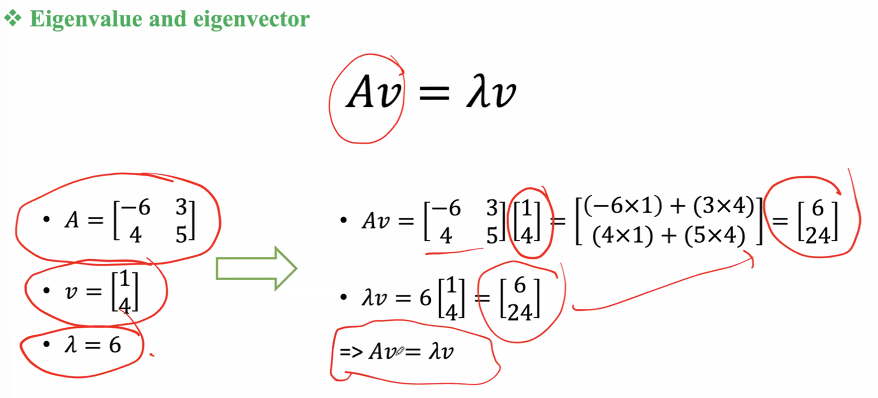




2.   Finding eigenvalue:

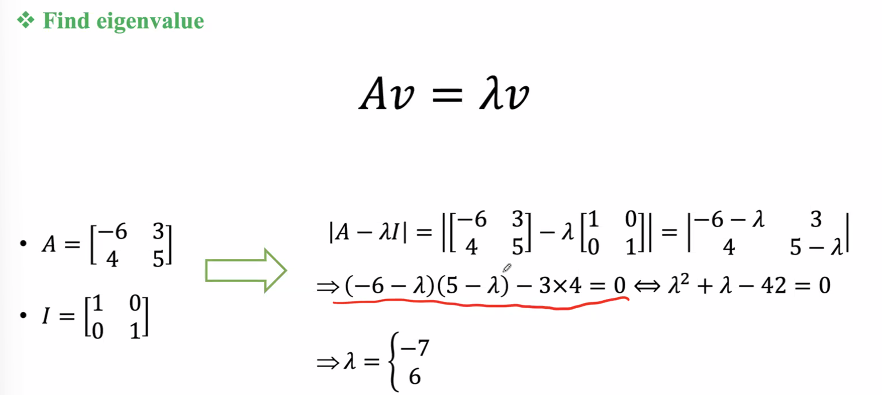



3. Finding eigenvector:

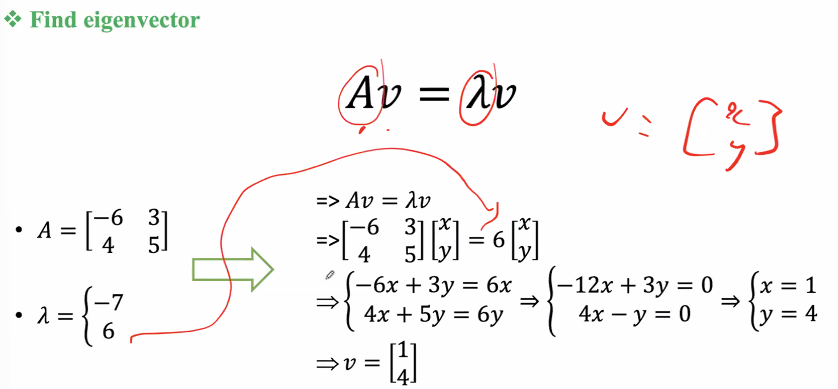

In [1]:
def compute_eigenvalues_eigenvectors(matrix):
  eigenvalues, eigenvectors = np.linalg.eig(matrix)
  return eigenvalues,eigenvectors

matrix = np. array ([[0.9 , 0.2] , [0.1 , 0.8]])
eigenvalues , eigenvectors = compute_eigenvalues_eigenvectors ( matrix )
print ( eigenvectors )

NameError: name 'np' is not defined

# Cosine similarity:



1.   Ví dụ 1:



In [ ]:
import numpy as np

def compute_cosine_similarity(v1, v2):
  res = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
  return res

v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])
result = compute_cosine_similarity(v1, v2)
print(result)

0.9746318461970762


2. Ví dụ 2:

In [ ]:
import numpy as np

def compute_cosine_similarity(v1, v2):
  res = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
  return res

x = np. array ([1 , 2 , 3 , 4])
y = np. array ([1 , 0 , 3 , 0])
result = compute_cosine_similarity (x,y)
print ( round (result , 3) )

0.577


# Background objection:


In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

bg1_image = cv2.imread('/content/sample_data/GreenBackground.png', 1)
bg1_image = cv2.resize(bg1_image, (678, 381))

ob_image = cv2.imread('/content/sample_data/Object.png', 1)
ob_image = cv2.resize(ob_image, (678, 381))

bg2_image = cv2.imread('/content/sample_data/NewBackground.jpg', 1)
bg2_image = cv2.resize(bg2_image, (678, 381))

In [ ]:
def computeDifference(bg_img, input_img):
    difference_three_channel = cv2.absdiff(bg_img, input_img)
    difference_single_channel = np.sum(difference_three_channel, axis=2) / 3.0
    difference_single_channel = difference_single_channel.astype('uint8')

    return difference_single_channel

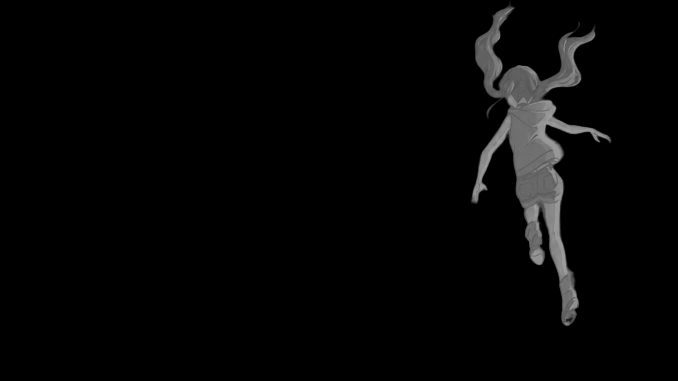

In [ ]:
difference_single_channel = computeDifference(bg1_image, ob_image)
cv2_imshow(difference_single_channel)

In [ ]:
def computeBinaryMask(difference_single_channel):
    difference_binary = np.where(difference_single_channel >= 15, 255, 0)
    difference_binary = np.stack((difference_binary,)*3, axis=-1)
    return difference_binary

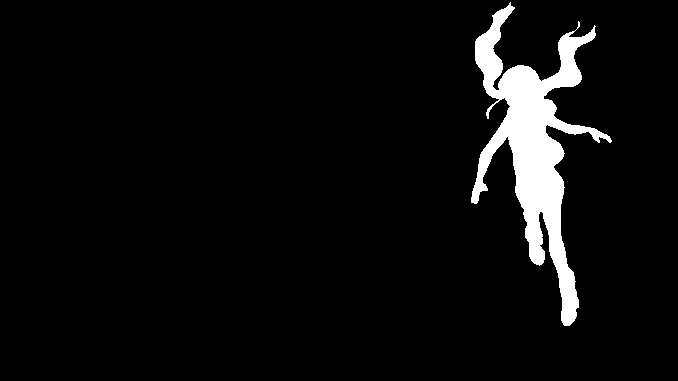

In [ ]:
binary_mask = computeBinaryMask(difference_single_channel)
cv2_imshow(binary_mask)

In [ ]:
def replaceBackGround(bg1_image, bg2_image, ob_image):
    difference_single_channel = computeDifference(bg1_image,ob_image)
    binary_mask = computeBinaryMask(difference_single_channel)

    output = np.where(binary_mask==255, ob_image, bg2_image)

    return output

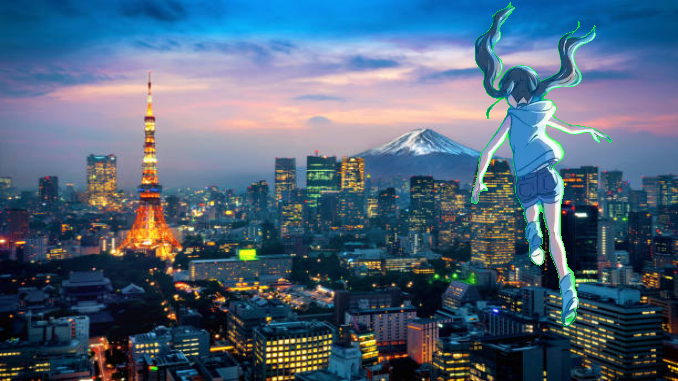

In [ ]:
output = replaceBackGround(bg1_image, bg2_image, ob_image)

cv2_imshow(output)